# **Loan Default Prediction Challenge**


### Train vs. Test
We will have two datasets: `train.csv` (70% of the data with loan defaults labeled) and `test.csv` (30% of the data without labels). We need to use patterns from `train.csv` to predict loan defaults in `test.csv`.

# Step 1: Dataset Description

In [69]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


# Note:
pd.set_option('display.max_colwidth', None) : means that when you display a DataFrame, it will show the full content of each column, regardless of how long the text is, without truncating it.

# Step 2: Import Modules and Load Data

In [70]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [71]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [72]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


# Step 3: Preprocessing the Dataset

### i. Explore the Data

In [73]:
# Step 1: Explore the train.csv Dataset

# Display basic information about the dataset
print(train_df.info())

#Display summary statistics of numerical features
print(train_df.describe())

#Display unique values of categorical features
for column in train_df.select_dtypes (include='object').columns:
    print(f"Unique values for {column}: {train_df[column].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### ii. Data Cleaning and Preprocessing

In [74]:
train_df.isnull().sum()

#Drop duplicates if any
train_df
train_df.drop_duplicates()

#Handle missing values (example: replace NoN with wean for numerical features)
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [75]:
categorical_cols= ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
train_df_encoded=pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

In [76]:
print("Cleaned Train Dataset:")

print(train_df_encoded.head())

Cleaned Train Dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  ...  \
0               4         15.23        36      0.44  ...   
1               1          4.81        60      0.68  ...   
2               3         21.17        24      0.31  ...   
3               3          7.07        24      0.23  ...   
4               4          6.51        48      0.73  ...   

   EmploymentType_Unemployed  MaritalStatus_Married  MaritalStatus_Single  \
0                          0                      0                     0   
1                          0       

### iii. Validate the Data

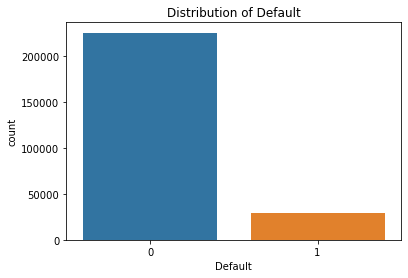

In [77]:
sns.countplot(x='Default', data=train_df_encoded)
plt.title('Distribution of Default')
plt.show()

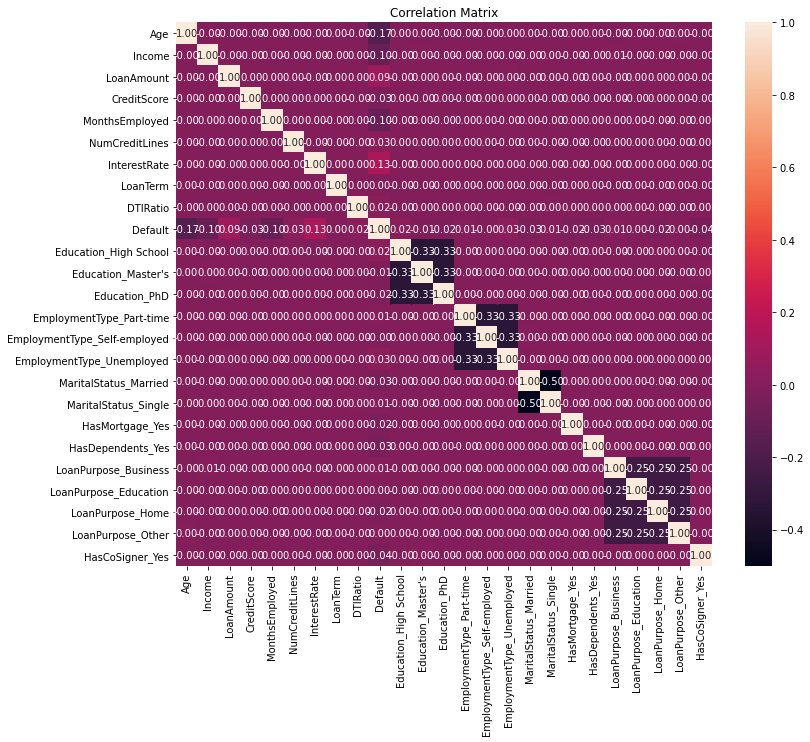

In [78]:
corr_matrix=train_df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### iv. Visualize the Data

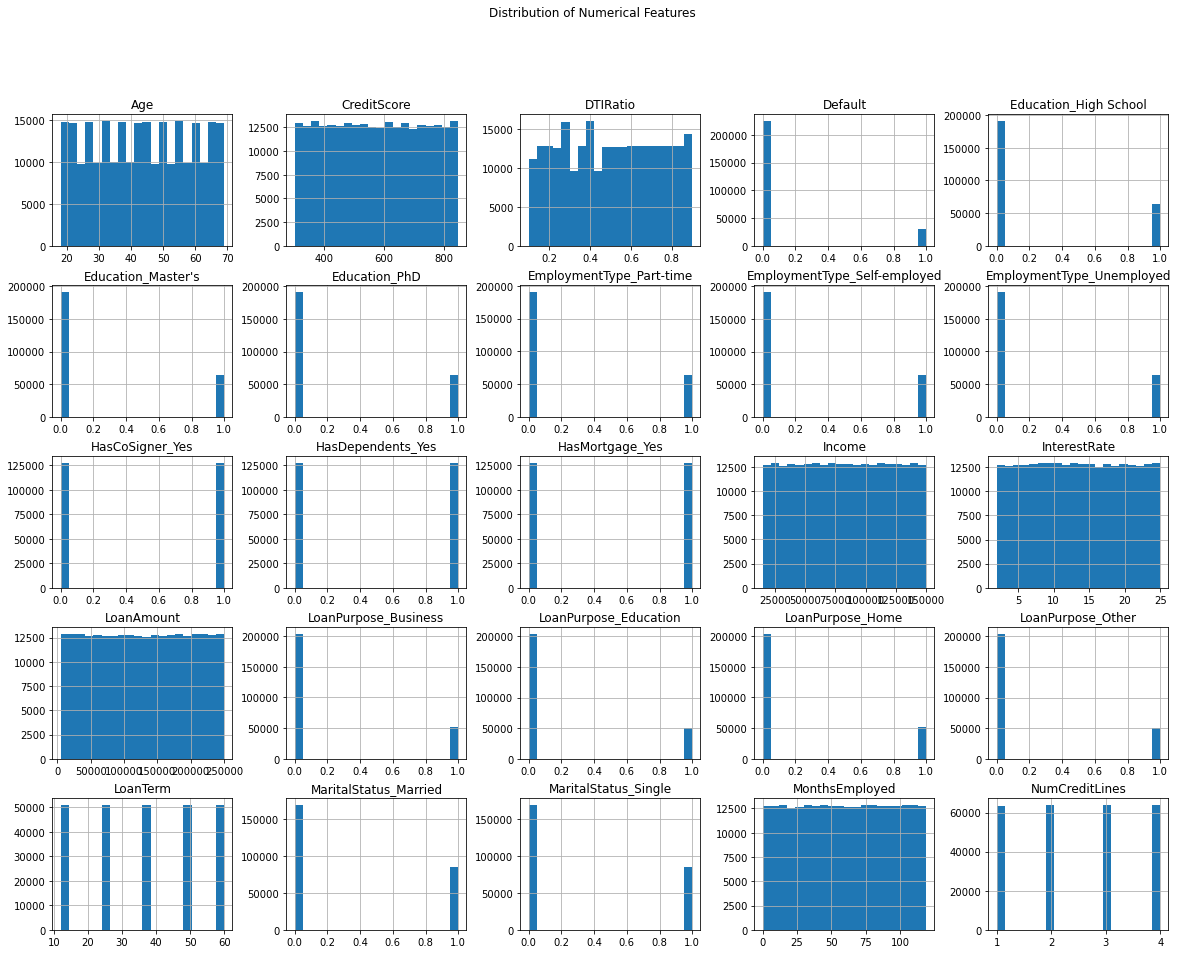

In [79]:
train_df_encoded.hist(bins=20, figsize=(20, 15)) 
plt.suptitle('Distribution of Numerical Features') 
plt.show()


### v. Apply PCA

In [80]:
#Separate features and target variable
X= train_df_encoded.drop(['LoanID', 'Default'], axis=1)
y=train_df_encoded['Default']

#Standardize the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#Apply PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

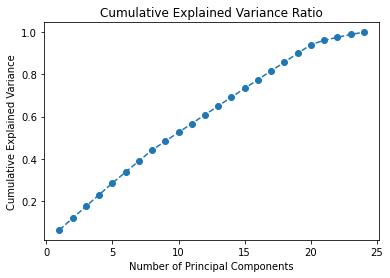

In [81]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


In [82]:
# Determine the optimal number of components based on the explained variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")


Number of components to retain 95% variance: 21


In [83]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [84]:
# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Concatenate the LoanID and Default columns
pca_df = pd.concat([train_df_encoded[['LoanID', 'Default']], pca_df], axis=1)


In [85]:
# Display the dataframe with principal components
print("Dataframe with Principal Components:")
print(pca_df.shape)


Dataframe with Principal Components:
(255347, 23)


# Step 4: Train the model

### i. Import Necessary Libraries and Separating Features and Target Variable

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [87]:
# Separate features and target variable
X_train = pca_df.drop(['LoanID', 'Default'], axis=1)
y_train = pca_df['Default']


In [88]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### ii. Model Training and Evaluation

In [89]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Output model parameters
print(model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [90]:
# Predict probabilities on the validation set
y_val_pred_proba = model.predict_proba(X_val)[:, 1]


In [91]:
from sklearn.metrics import roc_auc_score

# Evaluate the model using ROC AUC
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f'ROC AUC Score on Validation Set: {roc_auc:.6f}')


ROC AUC Score on Validation Set: 0.751146


# Step 5: Preprocess the test data and fed it into the model

In [92]:
# Drop rows with missing values
test_df.dropna(inplace=True)


In [93]:
# One-hot encode categorical variables
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Check the shape of the encoded DataFrame
print(test_df_encoded.shape)


(109435, 25)


In [94]:
# Exclude the target variable and standardize numerical features using the training scaler
X_test = test_df_encoded.drop(['LoanID'], axis=1)
X_test_scaled = scaler.transform(X_test)


In [95]:
# Apply PCA using the same PCA model from the training set
X_test_pca = pca.transform(X_test_scaled)

# Check the shape of the PCA-transformed test set
print(X_test_pca.shape)


(109435, 21)


In [96]:
# Make predictions on the test set
y_test_pred_proba = model.predict_proba(X_test_pca)[:, 1]


In [97]:
# Create a DataFrame for predictions
prediction_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'predicted_probability': y_test_pred_proba
})

# Verify the format and size of the predictions
print("Shape of prediction_df:", prediction_df.shape)
print("Name of the columns:", prediction_df.columns)


Shape of prediction_df: (109435, 2)
Name of the columns: Index(['LoanID', 'predicted_probability'], dtype='object')


# Step 6: Final submission

In [98]:
# Writing predictions to CSV for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)

# Read the submission file to verify
submission = pd.read_csv("prediction_submission.csv")

# Assertion to check if submission is a DataFrame
assert isinstance(submission, pd.DataFrame), "You should have a dataframe named prediction_df."


In [99]:
# Assertions to validate column names
assert submission.columns[0] == "LoanID", "The first column name should be LoanID."
assert submission.columns[1] == "predicted_probability", "The second column name should be predicted_probability."


In [100]:
# Assertions to validate the shape of the DataFrame
assert submission.shape[0] == 109435, "The dataframe prediction_df should have 109435 rows."
assert submission.shape[1] == 2, "The dataframe prediction_df should have 2 columns."
